In [0]:
# Loading Google Drive

from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


# Problem 1: A Detailed View to MNIST Classissification

### 1.1. Train a fully-connected net for MNIST classificcation (sorry, no CNN please, yet). It should be with 5 hidden layers each of which is with 1024 hidden units. Feel free to use whatever techniques you learned in class. You should be able to get the test accuracy above 98%.

In [0]:
# Importing the libraries we need

import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

# Loading the mnist data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True) #one_hot = True ensures that we have 1 for the class which is present in the image and 0 for other classes

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
# Seperating the X and y for training from the dataset we have loaded

X_train = mnist.train.images
y_train = mnist.train.labels
y_train = y_train.astype('int')

print(X_train.shape)
print(y_train.shape)

(55000, 784)
(55000, 10)


In [0]:
# Seperating the X and y for validating from the dataset we have loaded

X_val = mnist.validation.images
y_val = mnist.validation.labels
y_val = y_val.astype('int')

print(X_val.shape)
print(y_val.shape)

(5000, 784)
(5000, 10)


In [0]:
# Seperating the X and y for testing from the dataset we have loaded

X_test = mnist.test.images
y_test = mnist.test.labels
print(X_test.shape)
print(y_test.shape)

(10000, 784)
(10000, 10)


Input layer -> hidden layer 1 (activation function) -> weights -> hidden layer 2 (activation function) -> hidden layer 3 (activation function) -> hidden layer 4 (activation function) -> hidden layer 5 (activation function)


compare output class to intended class using a cost function (entropy etc.)
optimization function (optimizer) to minimze the loss function (Adam Optimizer, Stochastic Gradient Descent, AdaGrad etc...)

Use backprop to update weights

feed forward + back prop = 1 epoch

output of each layer = (input_data * weights) + biases


**Reference 1:** https://www.youtube.com/watch?v=BhpvH5DuVu8

**Reference 2:** Handson Machine Learning with scikit-learn and TensorFlow book

**Reference 3:** https://www.easy-tensorflow.com/tf-tutorials/neural-networks/two-layer-neural-network




In [0]:
# Defining the functions that we will need

# Function to shuffle the data we have before each epoch to ensure that the order of input data doesn't bias our model

def shuffle(X, y):
  '''
  X: Matrix containing the featurres that we want to shuffle. 
     The size is nxm where n is number of samples and m are the number of features
  y: vector containing the classes that we want to shuffle.
     The size is nx1 where n is the number of samples
     
     
  Reference: https://play.pixelblaster.ro/blog/2017/01/20/how-to-shuffle-two-arrays-to-the-same-order/
  '''
  
#   actual_index = np.arange(X.shape[0])
  # np.random.seed(10)
  shuffled_index = np.random.permutation(y.shape[0])
  
  X_shuffled = X[shuffled_index]
  y_shuffled = y[shuffled_index]
  
  return X_shuffled, y_shuffled

# def get_next_batch(X, y, start, end):
#   X_batch = X[start:end]
#   y_batch = y[start:end]
  
#   return X_batch, y_batch

def leaky_relu(z, name=None):
  return tf.maximum(0.01 * z, z, name=name)

def fully_connected_layer(X_input, no_of_units, layer_name,  batch_norm, training, activation_function):
  with tf.name_scope(layer_name):
    no_of_inputs = int(X_input.shape[1])
    '''Using a truncated normal distribution rather than a regular normal
       distribution ensures that there won’t be any large weights, which
       could slow down training.
    '''
    # Initializing weights using Xavier initialization strategy to avoid the issue of vanishing gradients
    # Reference page 278 of Hands-on Machine Learning with scikit-learn and TensorFlow book
    variance = 2/(no_of_inputs+no_of_units)
    random_values = tf.truncated_normal((no_of_inputs, no_of_units), 
                                        stddev=np.sqrt(2)*np.sqrt(variance))
    print("stddev used is:",np.sqrt(variance))
    weights = tf.Variable(random_values, name = "weights")
    biases = tf.Variable(tf.ones([no_of_units])*0.01, name = "biases")
    output = biases + tf.matmul(X_input,weights) 

    # Impemented batch_nomralization using the reference https://medium.com/@jaynilbvb/implementing-batch-normalization-in-tensorflow-db3784f61693
    if batch_norm:
      batchNorm = tf.layers.batch_normalization(output, training=training, momentum=0.99)
    else:
      batchNorm = output
          
    if activation_function == "relu":
      return tf.nn.relu(batchNorm)
    elif activation_function == "elu":
      return tf.nn.elu(batchNorm)
    elif activation_function == "leaky_relu":
      return leaky_relu(batchNorm)
    else:
      return output
          
        

In [0]:
# Defining the parameters to be used for defining the neural network


n_inputs = X_train.shape[1] # MNIST image size is 28 * 28
n_hidden_units1 = 1024
n_hidden_units2 = 1024
n_hidden_units3 = 1024
n_hidden_units4 = 1024
n_hidden_units5 = 1024
n_output_classes = 10


# epochs = 20             # Total number of training epochs
# batch_size = 100      # Training batch size
# display_freq = 100      # Frequency of displaying the training results
# learning_rate = 0.1   # The optimization initial learning rate

In [0]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None, n_output_classes), name="y")

In [0]:
# Generating the fully connected layers in the network

fully_connected_layer_1 = fully_connected_layer(X, n_hidden_units1, "fcc_1", batch_norm = False, training = True, activation_function = "elu")

fully_connected_layer_2 = fully_connected_layer(fully_connected_layer_1, n_hidden_units2, "fcc_2", batch_norm = False, training = True, activation_function = "elu")
fully_connected_layer_3 = fully_connected_layer(fully_connected_layer_2, n_hidden_units3, "fcc_3", batch_norm = False, training = True, activation_function = "elu")
fully_connected_layer_4 = fully_connected_layer(fully_connected_layer_3, n_hidden_units4, "fcc_4", batch_norm = False, training = True, activation_function = "elu")
fully_connected_layer_5 = fully_connected_layer(fully_connected_layer_4, n_hidden_units5, "fcc_5", batch_norm = False, training = True, activation_function = "elu")

# Generating the output layer of the network
output_layer = fully_connected_layer(fully_connected_layer_5, n_output_classes, "output_layer", batch_norm = False, training = True, activation_function = None)  

stddev used is: 0.033259505261886965
stddev used is: 0.03125
stddev used is: 0.03125
stddev used is: 0.03125
stddev used is: 0.03125
stddev used is: 0.04397994971335425


In [0]:
# Setting the learning rate to 0.01 for the optimizer
learning_rate = 0.001/7
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels = y, logits = output_layer)
loss_function = tf.reduce_mean(cross_entropy, name = "loss_function")

# Defining the Gradient Descent Optimizer we will use
# optimizer = tf.train.GradientDescentOptimizer(learning_rate, name = "GD-Opt").minimize(loss_function)
optimizer = tf.train.AdamOptimizer(learning_rate, name = "Adam-Opt").minimize(loss_function)

correct_pred = tf.equal(tf.argmax(output_layer, 1), tf.argmax(y, 1), name='correct_pred')
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name = 'accuracy')
 


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
# Initializing all variables

init = tf.global_variables_initializer()

In [0]:
saver = tf.train.Saver()

n_epochs = 40
batch_size = 50

max_test_accuracy = 0.98

# 
extra_graphkeys_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

# with tf.Session() as sess:
sess = tf.InteractiveSession()
# init.run()
sess.run(init)
for epoch in range(n_epochs):
  for iteration in range(mnist.train.num_examples // batch_size):
    X_batch, y_batch = mnist.train.next_batch(batch_size)
    X_batch, y_batch = shuffle(X_batch, y_batch)
    sess.run(optimizer, feed_dict={X: X_batch, y: y_batch})
  acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
  acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
  if acc_test > max_test_accuracy:
    max_test_accuracy = acc_test
    print("Highest test accuracy achieved till now!")
    save_path = saver.save(sess, "/content/drive/My Drive/Deep_Learning/Assignment_1/best_mnist_deep_learning_model.ckpt")
  print("Epoch:",epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

sess.close()

Epoch: 0 Train accuracy: 0.94 Test accuracy: 0.9566
Epoch: 1 Train accuracy: 0.98 Test accuracy: 0.958
Epoch: 2 Train accuracy: 1.0 Test accuracy: 0.9669
Epoch: 3 Train accuracy: 1.0 Test accuracy: 0.9723
Epoch: 4 Train accuracy: 1.0 Test accuracy: 0.97
Epoch: 5 Train accuracy: 0.98 Test accuracy: 0.9729
Epoch: 6 Train accuracy: 1.0 Test accuracy: 0.9722
Epoch: 7 Train accuracy: 1.0 Test accuracy: 0.9734
Epoch: 8 Train accuracy: 1.0 Test accuracy: 0.9734
Epoch: 9 Train accuracy: 1.0 Test accuracy: 0.9713
Epoch: 10 Train accuracy: 0.98 Test accuracy: 0.9747
Epoch: 11 Train accuracy: 1.0 Test accuracy: 0.972
Epoch: 12 Train accuracy: 0.98 Test accuracy: 0.9736
Epoch: 13 Train accuracy: 1.0 Test accuracy: 0.9772
Highest test accuracy achieved till now!
Epoch: 14 Train accuracy: 1.0 Test accuracy: 0.9802
Highest test accuracy achieved till now!
Epoch: 15 Train accuracy: 1.0 Test accuracy: 0.9804
Epoch: 16 Train accuracy: 1.0 Test accuracy: 0.9761
Epoch: 17 Train accuracy: 1.0 Test accuracy

### 1.3 Once you're done with training, as a starter, do a feedforward step on your test samples, a thousand of them. Capture the output of the softmax layer, which will be a 10-dim probability vector per sample. In other words, each output dimension has 1,000 predictions corresponding to the 1,000 examples. For each 10-d output vector, find the dim with the maximum probability (which will eventually decide the class label). Plot the input image associated with that in a grid of subplots. For example, you can create a 10 x 10 grid of subplots, whose first row plots first ten input images that produced the highest probabilities for the first dim (which corresponds to 0). Eventually, if your classiffication was near perfect, you'll see ten 0's in the first row, ten 1's in the second, and so on.

In [0]:
sess = tf.InteractiveSession()
saver.restore(sess, "/content/drive/My Drive/Deep_Learning/Assignment_1/best_mnist_deep_learning_model.ckpt")

X_test_shuf, y_test_shuf = shuffle(X_test, y_test)

input_test_X = X_test_shuf[:1000]
input_test_y =  y_test_shuf[:1000]

predictions = list(sess.run(tf.argmax(output_layer, 1), feed_dict={X: input_test_X, y: input_test_y}))

predicted_number_indice = {}

for indexes in range(10):
  predicted_number_indice[indexes] = [i for i, x in enumerate(predictions) if x == indexes]


predicted_probability_indice = {}

prob = sess.run(tf.nn.softmax(output_layer), feed_dict={X: input_test_X, y: input_test_y})



for key in predicted_number_indice:
  probs = []
  for row in prob[predicted_number_indice[key]]:
    probs.append(row[key])
  predicted_probability_indice[key] = probs

highest_probabilty_ten_image_indice = {}

for key in predicted_number_indice:
  highest_probabilty_ten_image_indice[key] = [x for y, x in sorted(zip(predicted_probability_indice[key], predicted_number_indice[key]), reverse = True)[:10]]



all_desired_image_indexes = []

for key in highest_probabilty_ten_image_indice:
  for element in highest_probabilty_ten_image_indice[key]:
    all_desired_image_indexes.append(element)






# print(opt.shape)
print(predictions)
print(predicted_number_indice)
print(predicted_probability_indice)
print(highest_probabilty_ten_image_indice)
print(all_desired_image_indexes)


# print(prob[predicted_number_indice[0]])
sess.close ()

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/Deep_Learning/Assignment_1/best_mnist_deep_learning_model.ckpt
[2, 6, 7, 5, 5, 1, 2, 9, 8, 8, 1, 3, 2, 9, 5, 7, 1, 0, 0, 5, 5, 5, 6, 0, 5, 7, 9, 8, 3, 6, 8, 2, 9, 4, 6, 2, 5, 5, 3, 3, 5, 0, 2, 3, 5, 3, 0, 3, 7, 9, 1, 4, 4, 4, 6, 3, 4, 5, 2, 6, 4, 9, 8, 0, 3, 0, 5, 0, 8, 0, 1, 0, 0, 0, 0, 0, 9, 9, 8, 9, 4, 1, 2, 7, 7, 2, 3, 5, 4, 9, 0, 4, 9, 9, 8, 1, 7, 4, 6, 7, 2, 4, 4, 5, 4, 6, 8, 0, 3, 1, 0, 2, 1, 0, 6, 8, 0, 1, 3, 7, 1, 4, 0, 8, 5, 1, 3, 0, 6, 1, 1, 0, 8, 9, 4, 0, 3, 4, 6, 8, 2, 8, 3, 1, 9, 7, 4, 7, 5, 8, 2, 7, 1, 4, 3, 6, 7, 1, 5, 6, 6, 2, 9, 4, 3, 6, 3, 0, 4, 6, 8, 3, 8, 7, 9, 9, 3, 1, 3, 4, 8, 3, 0, 6, 7, 0, 0, 3, 8, 2, 5, 5, 2, 2, 2, 7, 0, 8, 3, 9, 0, 7, 8, 5, 3, 7, 8, 4, 9, 0, 1, 7, 4, 1, 5, 3, 9, 4, 4, 4, 5, 6, 9, 8, 4, 4, 2, 4, 4, 2, 9, 2, 0, 2, 7, 5, 7, 9, 9, 8, 6, 0, 2, 2, 1, 6, 8, 9, 9, 3, 3, 5, 4, 6, 0, 1, 9, 2, 1, 5, 8, 

(784,)


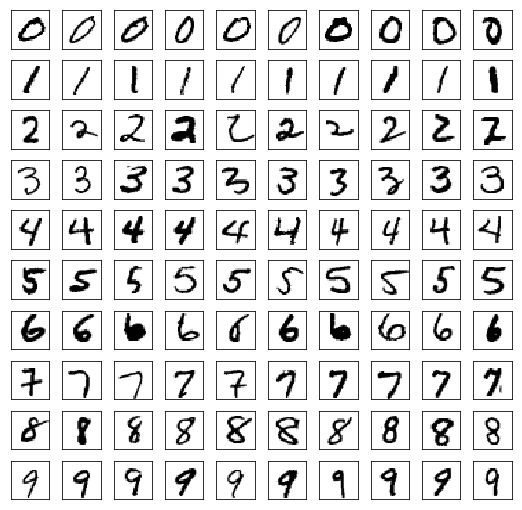

In [0]:
import matplotlib
import matplotlib.pyplot as plt

images = input_test_X[all_desired_image_indexes]
print(images[1].shape)


fig, axes = plt.subplots(10, 10, figsize=(9, 9))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i, ax in enumerate(axes.flat):
  # Plot image.
  ax.imshow(images[i].reshape(28, 28), cmap = 'binary')

  # Remove ticks from the plot.
  ax.set_xticks([])
  ax.set_yticks([])
plt.show(block=False)

### 1.4. Repeat the procedure in Problem 1.3 for your second to the last layer output. This time, you should have 1024-dim vector per sample. Choose 10 random dimensions of interest and repeat the procedure in 1.3 as if the 10 out of 1024 dimensions are your output vectors. Note that there can be some dimensions that are with less than 10 images associated, because they are not popular. In your 10 x 10 grid, now there must be some rows that are not with enough number of images or even an empty rows.

In [0]:
sess = tf.InteractiveSession()
saver.restore(sess, "/content/drive/My Drive/Deep_Learning/Assignment_1/best_mnist_deep_learning_model.ckpt")

# X_test_shuf, y_test_shuf = shuffle(X_test, y_test)

input_test_X = X_test_shuf[:1000]
input_test_y =  y_test_shuf[:1000]

ouput_second_last_layer = sess.run(fully_connected_layer_5, feed_dict={X: input_test_X})
print(ouput_second_last_layer.shape)

# np.random.seed(10)

desired_output = ouput_second_last_layer[:,np.random.randint(0,1023,size = 10)]
# desired_output = ouput_second_last_layer[:,10:20]
print(desired_output.shape)

prediction = np.argmax(desired_output,  1)
print(prediction)
print(len(prediction))

output_class_count_dict = {}
output_class_images_dict = {}
for i in range(10):
  output_class_count_dict[i] = 0
  output_class_images_dict[i] = list()




for index,output in enumerate(desired_output):
  output_list = list(output)
  pred = output_list.index(max(output_list))
  if pred not in output_class_count_dict:
    output_class_count_dict[pred] = 1

  else:
    output_class_count_dict[pred] += 1


print(output_class_count_dict)

for image_number, value in enumerate(prediction):
  if value not in output_class_images_dict:
    output_class_images_dict[value] = [image_number]
  else:
    output_class_images_dict[value] += [image_number]

print(output_class_images_dict)

all_desired_image_indexes = list()

for key in sorted(output_class_images_dict.keys()):
  output_class_images_dict[key] = output_class_images_dict[key][:10]
  all_desired_image_indexes += output_class_images_dict[key][:10]

print(output_class_images_dict)
print(all_desired_image_indexes)

sess.close()



INFO:tensorflow:Restoring parameters from /content/drive/My Drive/Deep_Learning/Assignment_1/best_mnist_deep_learning_model.ckpt
(1000, 1024)
(1000, 10)
[8 8 1 8 8 1 8 1 8 8 1 5 8 1 8 4 3 0 3 2 4 8 1 0 8 1 1 8 5 8 8 8 1 1 8 8 2
 8 5 8 2 0 1 0 8 4 4 8 1 1 5 1 1 4 4 8 1 8 8 8 1 1 8 2 6 3 1 3 8 8 3 4 8 0
 0 0 1 1 8 1 1 3 1 3 1 8 5 2 1 1 0 1 1 1 8 3 1 1 0 1 5 1 1 2 1 8 8 0 8 3 0
 8 1 0 8 8 4 2 1 1 1 1 4 8 8 6 6 0 8 3 3 3 8 1 1 3 5 1 8 1 1 8 5 1 1 1 1 1
 0 8 2 1 3 1 8 1 1 5 2 1 0 8 3 1 8 4 1 3 1 7 8 1 8 1 1 1 5 6 8 1 8 5 3 8 1
 3 4 0 8 8 8 2 8 2 4 1 6 0 5 1 0 1 8 2 8 3 1 1 1 0 1 1 1 3 8 8 1 1 4 1 2 4
 1 8 1 1 8 1 1 1 1 8 8 8 1 8 1 1 1 8 0 0 2 2 2 1 8 1 1 5 8 8 4 1 3 3 1 2 5
 7 8 6 5 1 8 1 1 1 3 8 1 8 8 2 0 8 1 1 8 8 1 8 1 4 4 1 2 8 8 1 1 8 1 1 3 1
 1 1 0 1 1 4 1 3 8 1 1 5 8 8 8 4 3 1 1 1 1 8 2 1 1 1 8 3 1 0 2 8 1 5 6 6 1
 1 1 1 8 1 1 0 3 0 2 0 8 1 5 8 6 8 3 8 1 8 2 1 1 1 1 8 6 1 1 8 1 1 8 1 1 0
 1 3 3 1 1 1 3 1 2 8 6 5 8 3 6 1 8 8 2 1 2 8 1 2 4 1 8 3 1 2 1 4 1 8 8 1 2
 8 2 3 0 2 8 1 8 8 0 0

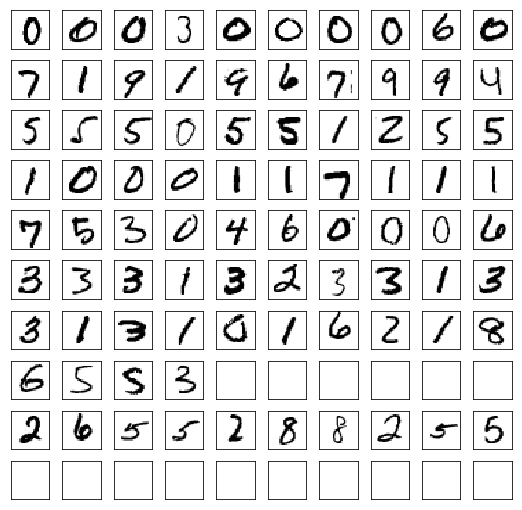

In [0]:
# import matplotlib
# import matplotlib.pyplot as plt

# images = input_test_X[all_desired_image_indexes]
images = []
for cl in output_class_images_dict:
  if len(output_class_images_dict[cl]) == 10:
    for image_index in output_class_images_dict[cl]:
      images.append(input_test_X[image_index])
  else:
    for image_index in output_class_images_dict[cl]:
      images.append(input_test_X[image_index])
    for ind in range(10-len(output_class_images_dict[cl])):
      images.append(np.zeros(784))

images = np.array(images)



fig, axes = plt.subplots(10, 10, figsize=(9, 9))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i, ax in enumerate(axes.flat):
  # Plot image.  
  ax.imshow(images[i].reshape(28, 28), cmap = 'binary')

  # Remove ticks from the plot.
  ax.set_xticks([])
  ax.set_yticks([])
plt.show(block=False)

### Explain your observation compared with the results from 1.3. What can you see? What would have been the ideal situation for this second-to- the-last layer? 

In 1.3, we observe that we have images corresponding to each class in each row i.e. first row has images with all 0's, second row will all 1's and so on.

In 1.4, the images associated with each neuron appear random to human beings. This is because each neuron has learned its own feature and the neuron is activated when that feature is present in the image fed to the network. We are feeding random 1,000 images from the test dataset to the network, the probability of all the 10 randomly selected neurons is less (but the scenario is definitely possible). 

To explain this we can imagine each layer as feature space transformation where each layer transforms the feature space of the data with the goal of achieving 10 features in the last layer which are discriminitative in nature. Basically, it means that they are able to discriminate amongst the 10 classes available with an accuracy of more than 98%.

However, the 10 random features from the second to the last layer will not be as dicriminitative in nature and their activation depends on whether the image fed to the network has the feature available which the random 10 neurons have learned during training. These features don't always make sense to human beings.

An ideal situation for second-to-the-last layer would be selecting 10 such neurons which are matching specific patterns in the images. An example would be all the images with 6,9 and 8 activate a neuron which is detecting the shape 'o' in the images which would help us visualize how the neural network works

### 1.6 First, take a thousand test samples from your MNIST dataset. Apply tSNE and PCA on the attend 784-dim pixels. Now you have 2 x 1000 (or 1000 x 2 if you transposed the data) matrix from each of the dim reduction algorithms. Scatter plot the data samples. USE THE LABELS OF THE DATA SAMPLES SO THAT EACH SET OF SAMPLES FROM THE SAME CLASS ARE REPRESENTED WITH THE SAME COLOR. OVERLAY THE CLASS LABEL ON TOP OF THE MEAN OF THE CLASS.

In [0]:
# Defining the helper function for 1.6 onwards
# Reference https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

from sklearn.decomposition import PCA
import pandas as pd

from sklearn.manifold import TSNE

def plot_principal_components(X,actual_classes, title):
  pca = PCA(n_components=2)
  principalComponents = pca.fit_transform(X)


  principalComponents_with_means = pd.DataFrame({'Principal_Component_1':principalComponents[:,0],
                                                 'Principal_Component_2':principalComponents[:,1],
                                                 'Y':actual_classes})


                                      

  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(1,1,1) 
  ax.set_xlabel('Principal Component 1', fontsize = 15)
  ax.set_ylabel('Principal Component 2', fontsize = 15)
  ax.set_title(title, fontsize = 20)
  targets = list(range(10))
  colors = ['C'+str(i) for i in range(10)]

  for target, color in zip(targets,colors):

    # adding data points
    indicesToKeep = principalComponents_with_means['Y'] == target
    ax.scatter(x = principalComponents_with_means.loc[indicesToKeep,'Principal_Component_1']
               , y = principalComponents_with_means.loc[indicesToKeep,'Principal_Component_2']
               , c = color
               , s = 50, alpha = 0.2)
    
    ax.annotate(target, 
                principalComponents_with_means.loc[indicesToKeep,['Principal_Component_1','Principal_Component_2']].mean(),
                horizontalalignment='center',
                verticalalignment='center',
                size=20, weight='bold',
                color = color)
  # ax.legend(targets)
  ax.grid()


def plot_tsne_components(X,actual_classes, title):
  pca = TSNE(n_components=2)
  principalComponents = pca.fit_transform(X)

  principalComponents_with_means = pd.DataFrame({'Principal_Component_1':principalComponents[:,0],
                                                 'Principal_Component_2':principalComponents[:,1],
                                                 'Y':actual_classes})


                                      

  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(1,1,1) 
  ax.set_xlabel('tSNE Component 1', fontsize = 15)
  ax.set_ylabel('tSNE Component 2', fontsize = 15)
  ax.set_title(title, fontsize = 20)
  targets = list(range(10))
  colors = ['C'+str(i) for i in range(10)]

  for target, color in zip(targets,colors):

    # adding data points
    indicesToKeep = principalComponents_with_means['Y'] == target
    ax.scatter(x = principalComponents_with_means.loc[indicesToKeep,'Principal_Component_1']
               , y = principalComponents_with_means.loc[indicesToKeep,'Principal_Component_2']
               , c = color
               , s = 50, alpha = 0.2)
    
    ax.annotate(target, 
                principalComponents_with_means.loc[indicesToKeep,['Principal_Component_1','Principal_Component_2']].mean(),
                horizontalalignment='center',
                verticalalignment='center',
                size=20, weight='bold',
                color = color)
  # ax.legend(targets)
  ax.grid()



INFO:tensorflow:Restoring parameters from /content/drive/My Drive/Deep_Learning/Assignment_1/best_mnist_deep_learning_model.ckpt


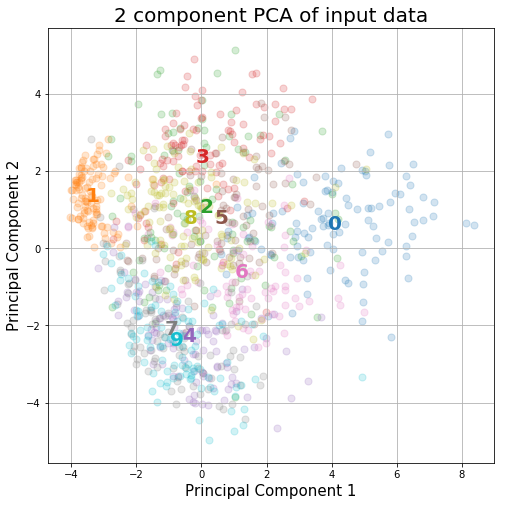

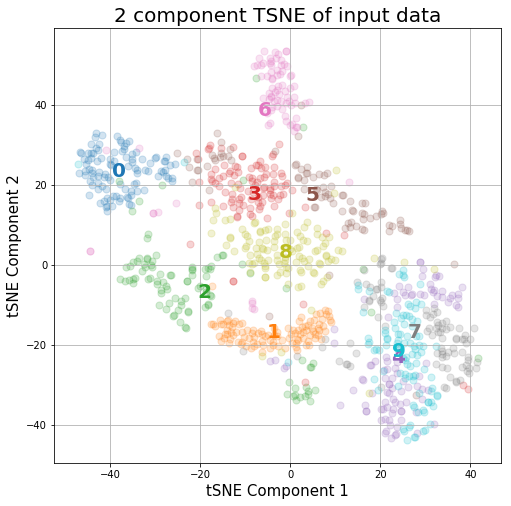

In [0]:
# Question 1.6:


sess = tf.InteractiveSession()
saver.restore(sess, "/content/drive/My Drive/Deep_Learning/Assignment_1/best_mnist_deep_learning_model.ckpt")

input_test_X = X_test_shuf[:1000]
input_test_y =  y_test_shuf[:1000]
actual_classes = np.argmax(input_test_y, 1)
# print(actual_classes)

plot_principal_components(input_test_X, actual_classes, '2 component PCA of input data')
plot_tsne_components(input_test_X, actual_classes, '2 component TSNE of input data')

sess.close()

### By doing so, you can examine if your data is easy to classify or not. Do you think this raw image samples are easy to classify?

The raw samples are sparsely distributed and we cannot see any decision boundary which can help us classify them in the current feature space. In other words, the raw image samples are not easy to classify in the current feature space

In [0]:
# Question 1.7:


sess = tf.InteractiveSession()
saver.restore(sess, "/content/drive/My Drive/Deep_Learning/Assignment_1/best_mnist_deep_learning_model.ckpt")

input_test_X = X_test_shuf[:1000]
input_test_y =  y_test_shuf[:1000]
actual_classes = np.argmax(input_test_y, 1)

ouput_first_layer = sess.run(fully_connected_layer_1, feed_dict={X: input_test_X})
print(ouput_first_layer.shape)

ouput_second_layer = sess.run(fully_connected_layer_2, feed_dict={X: input_test_X})
print(ouput_second_layer.shape)

ouput_third_layer = sess.run(fully_connected_layer_3, feed_dict={X: input_test_X})
print(ouput_third_layer.shape)

ouput_fourth_layer = sess.run(fully_connected_layer_4, feed_dict={X: input_test_X})
print(ouput_fourth_layer.shape)

ouput_fifth_layer = sess.run(fully_connected_layer_5, feed_dict={X: input_test_X})
print(ouput_fifth_layer.shape)

ouput_last_layer = sess.run(output_layer, feed_dict={X: input_test_X}) 
print(ouput_last_layer.shape)

sess.close()

INFO:tensorflow:Restoring parameters from /content/drive/My Drive/Deep_Learning/Assignment_1/best_mnist_deep_learning_model.ckpt
(1000, 1024)
(1000, 1024)
(1000, 1024)
(1000, 1024)
(1000, 1024)
(1000, 10)


### 1.7 Do a feedforward using your classiffier. Capture the output of your first hidden layer, which will give you 1024 x 1000 matrix. What that means is that you transformed your input data into a 1024-dim space. You may hope that this makes your classiffication easier. Check it out by doing tSNE and PCA on this matrix, which will once again give you 2 x 1000 matrix.

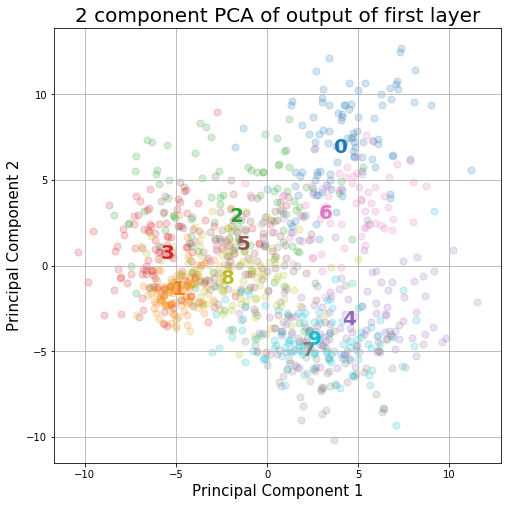

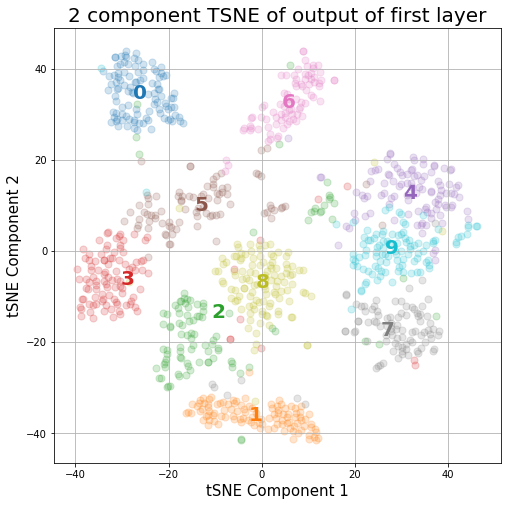

In [0]:
# Question 1.7:

plot_principal_components(ouput_first_layer, actual_classes, '2 component PCA of output of first layer')

plot_tsne_components(ouput_first_layer, actual_classes, '2 component TSNE of output of first layer')

### Scatter plot and check out if this layer gives you a better representation

The output of this layer gives us a better representation and we can see some clear clusters for the tSNE plot as compared to the PCA plot


### 1.8 Repeat this procedure for all your layers including the last one.

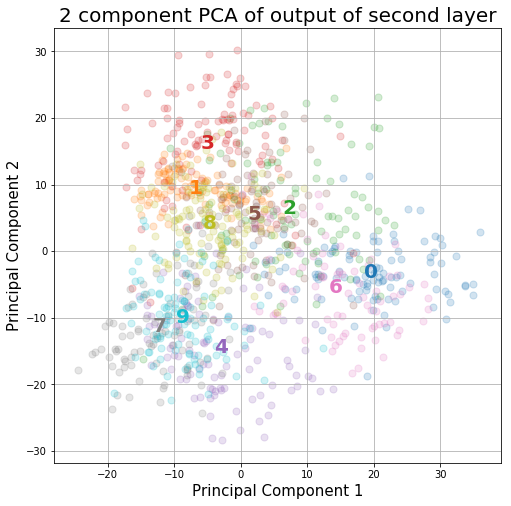

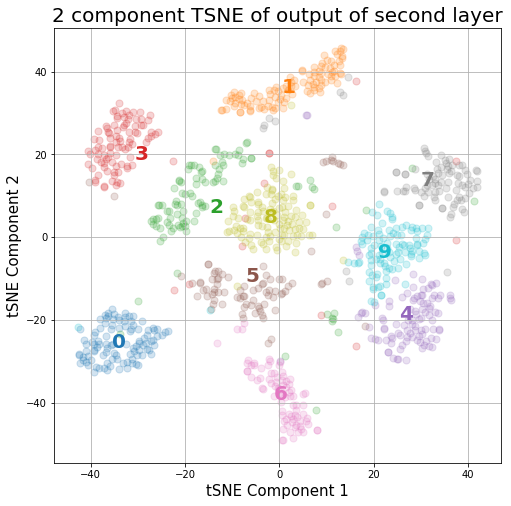

In [0]:
plot_principal_components(ouput_second_layer, actual_classes, '2 component PCA of output of second layer')

plot_tsne_components(ouput_second_layer, actual_classes, '2 component TSNE of output of second layer')

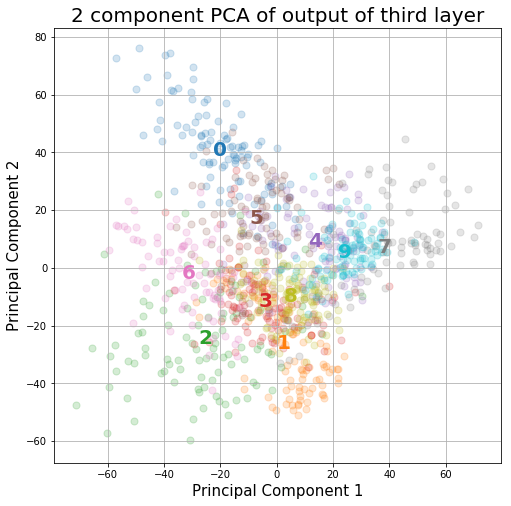

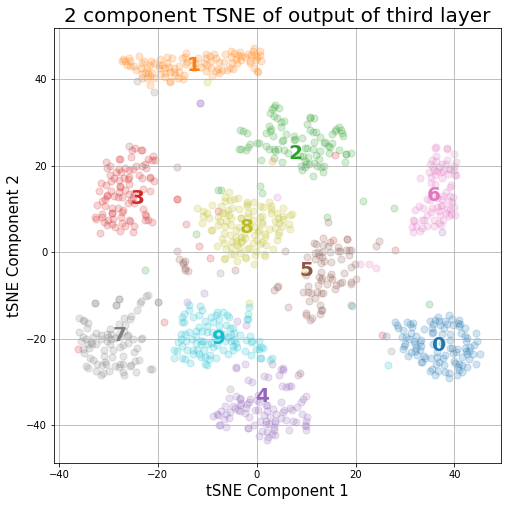

In [0]:
plot_principal_components(ouput_third_layer, actual_classes, '2 component PCA of output of third layer')

plot_tsne_components(ouput_third_layer, actual_classes, '2 component TSNE of output of third layer')

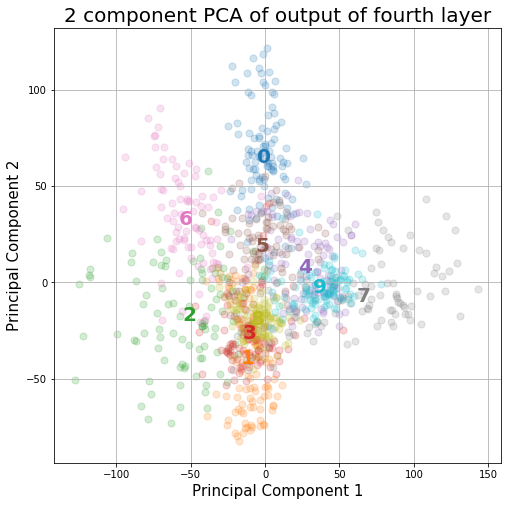

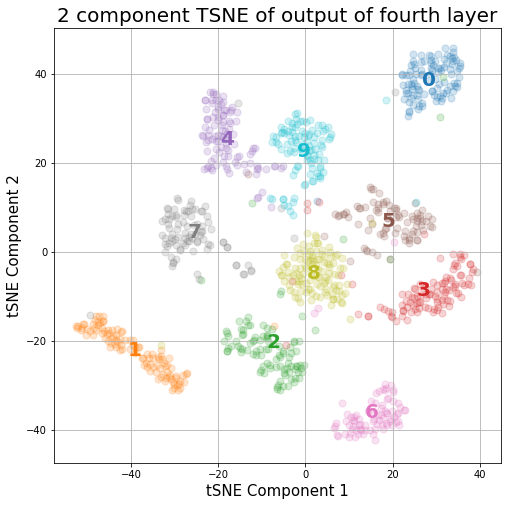

In [0]:
plot_principal_components(ouput_fourth_layer, actual_classes, '2 component PCA of output of fourth layer')

plot_tsne_components(ouput_fourth_layer, actual_classes, '2 component TSNE of output of fourth layer')

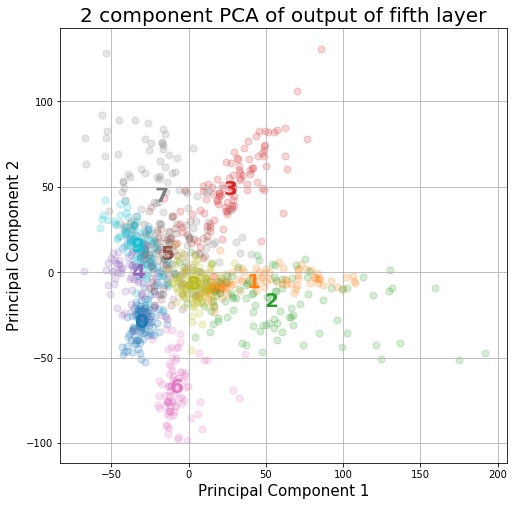

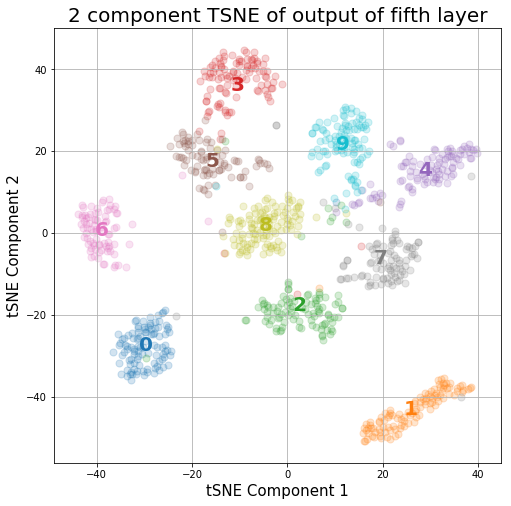

In [0]:
plot_principal_components(ouput_fifth_layer, actual_classes, '2 component PCA of output of fifth layer')

plot_tsne_components(ouput_fifth_layer, actual_classes, '2 component TSNE of output of fifth layer')

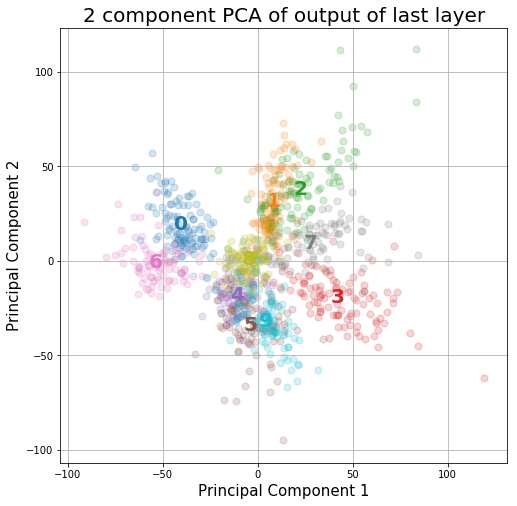

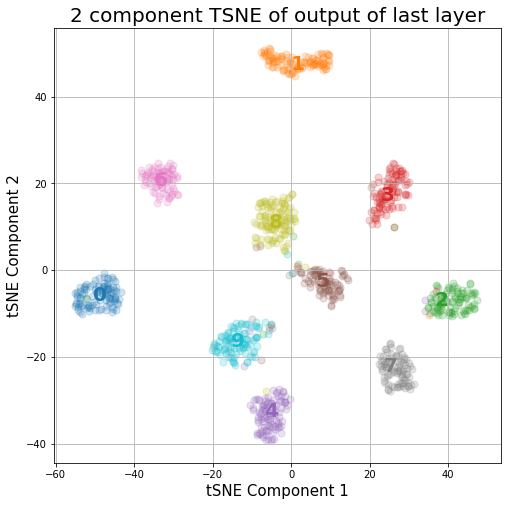

In [0]:
plot_principal_components(ouput_last_layer, actual_classes, '2 component PCA of output of last layer')

plot_tsne_components(ouput_last_layer, actual_classes, '2 component TSNE of output of last layer')

### Explain your observation.

We see that the clustering in tSNE improves consistently as we move from hidden layer 1 to the output layer in the network. We observe similar results for PCA too but the clusters are not as apparent as they are in tSNE plots. This is in-line with the fact that the layers in the neural network does feature space transformation where each layer transforms the feature space of the data with the goal of achieving 10 features in the last layer which are discriminitative in nature. Basically, it means that they are able to discriminate amongst the 10 classes available with an accuracy of more than 98%.


The reason why tSNE plot always shows a better clustering pattern as compared to PCA is that tSNE algorithm tries to keep the original pattern in data (keeping the points of each class to each other in this case) when the data is projected to a lower dimension. On the other hand, PCA tries to find the 2 principal components such that variance explained by those components is the highest without taking into account the original pattern in the data